# Which jobs had the highest average growth in pay after adjusting for inflation from 2003 to 2018 in Louisville Ky?

To figure this out I will look at data collected from The Occupational Information Network (https://www.onetonline.org/).  I will look at data collected in 5 year increments from 2003 to 2018 and the data looked at will only be Louisville Kentucky data. 

**Why not look at the highest paying jobs?**

Looking at the highest paying job does suggest that a particular job is valued at the specific time that that job is viewed.  However, jobs that see a continuous increase in income suggest that the supply is not meeting the demand, and leads to an increase in pay.  Therefore, we should see growth in the pay for jobs in high demand. 


In [1]:
import sqlite3
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**I cleaned the data in the other file and this contains only the clean dataset.**

In [2]:
occupation_file_name = os.path.join('new_occupation.csv')

In [3]:
occupation = pd.read_csv(occupation_file_name, index_col=0)

In [4]:
occupation["OCC_TITLE"] = occupation["OCC_TITLE"].str.lower()
pop=occupation.pop('Unnamed: 19')

## Converting to 2018 dollars
In economics the term real dollars is the value of currency after being adjusted for inflation.  I will turn everything into 2018 dollars and to compute the difference I used an inflation calculator, which can be found in the following website 
https://www.usinflationcalculator.com/

Adjusted for inflation, 1.00 in 2003 is equal to 1.36 in 2018, with a 36.5% cumulative rate of inflation.

Adjusted for inflation, 1.00 in 2008 is equal to 1.17 in 2018, with a 16.6% cumulative rate of inflation.

Adjusted for inflation, 1.00 in 2013 is equal to 1.08 in 2018, with a 7.8% cumulative rate of inflation. 

In [5]:
#This formula converts each year to 2018 dollars, which contorls for inflation. 
occupation.columns[5:18]

for x in occupation.columns[5:18]:
    occupation.loc[(occupation.YEAR == 2013), x] *=1.08
    occupation.loc[(occupation.YEAR == 2008), x] *=1.17
    occupation.loc[(occupation.YEAR == 2003), x] *=1.36


## Checking to see how many occupations existed across all four sample years

As you can see there are 389 jobs that where in all four instances, 128 in three, 139 in two, and 80 in 1.  In the future, I can use this to look at jobs that became obsolete or jobs that are newly created. For this project I will only look at the four year data. 

In [6]:
#This counts the number of instances of a specific job code.  
occ_count=occupation.groupby('OCC_CODE')
occ_count_all = occ_count.size()
occ_count_all.value_counts()

4    389
2    139
3    128
1     80
dtype: int64

In [7]:
#I made a bunch of dictionaries that contain the job code as the key and the number of years as its items.  
#I know that dictionaries can be converted to pandas easily.  I may also use this dictionary in for loops. 
total_instance=occupation.groupby(['OCC_CODE'])
total_instance=total_instance.size()
dict4={}
dict3={}
dict2={}
dict1={}
for y, x in total_instance.items():
    if x == 4:
        dict4.update({y:x})
    elif x == 3:
        dict3.update({y:x})
    elif x == 2:
        dict2.update({y:x})
    else:
        dict1.update({y:x})   


In [8]:
#Sort values for percent change
occupation.sort_values(['YEAR', 'OCC_CODE'], ascending=[1, 1], inplace=True)

#Create Percent Change for the hourly mean (H_MEAN) and annual means (A_MEAN) items
occupation['H_CHANGE'] = occupation.groupby('OCC_CODE').H_MEAN.pct_change()
occupation['A_CHANGE'] = occupation.groupby('OCC_CODE').A_MEAN.pct_change()

In [9]:
#I am using this to create new rows and then I am collecting the location for further manipulation
occupation = occupation.assign(**{'FOUR_YEAR':"False"})
y4_loc=occupation.columns.get_loc('FOUR_YEAR')

# I am using this to populate the newly created rows. 
locnumber=0
for index, row in occupation.iterrows():
    occupation.iloc[locnumber:,y4_loc] = (row['OCC_CODE'] in dict4)
    locnumber +=1

#Here is data that is just Occupation data that has each based on the different ways I sepereated them.  
occupation_4 = occupation[occupation['FOUR_YEAR'] == True]

#Lower-cased the job titles making it easier to search terms.
occupation["OCC_TITLE"] = occupation["OCC_TITLE"].str.lower()

### SQL TABLES AND GRAPHS

In [10]:
occupation_4=occupation_4.sort_values(by='YEAR', ascending=False)
occupation_4.to_sql("occ_table",sqlite3.connect('occ.db'), if_exists ="replace")

In [11]:
con = sqlite3.connect("occ.db")

Below is a list that contains the average 

In [22]:
#This is sorting the data by the average hourly percent change. Where those with the highest percent change fairing better.   
highest_h_ave= pd.read_sql_query("SELECT OCC_CODE,OCC_TITLE, AVG(H_CHANGE) as H_Change_Average FROM occ_table GROUP BY OCC_CODE ORDER BY H_Change_Average DESC LIMIT 10", con)
highest_h_ave

,OCC_CODE,OCC_TITLE,H_Change_Average
0,27-2012,producers and directors,0.134717
1,11-9061,funeral service managers,0.109731
2,49-9098,"helpers--installation, maintenance, and repair...",0.080048
3,19-4091,environmental science and protection technicia...,0.042304
4,11-2011,advertising and promotions managers,0.040898
5,11-3061,purchasing managers,0.039929
6,29-1066,psychiatrists,0.036577
7,39-9032,recreation workers,0.031287
8,13-2082,tax preparers,0.029210
9,27-4032,film and video editors,0.021536


OCC_CODE
11-2011    AxesSubplot(0.125,0.125;0.775x0.755)
11-3061    AxesSubplot(0.125,0.125;0.775x0.755)
11-9061    AxesSubplot(0.125,0.125;0.775x0.755)
13-2082    AxesSubplot(0.125,0.125;0.775x0.755)
19-4091    AxesSubplot(0.125,0.125;0.775x0.755)
27-2012    AxesSubplot(0.125,0.125;0.775x0.755)
27-4032    AxesSubplot(0.125,0.125;0.775x0.755)
29-1066    AxesSubplot(0.125,0.125;0.775x0.755)
39-9032    AxesSubplot(0.125,0.125;0.775x0.755)
49-9098    AxesSubplot(0.125,0.125;0.775x0.755)
Name: H_MEAN, dtype: object

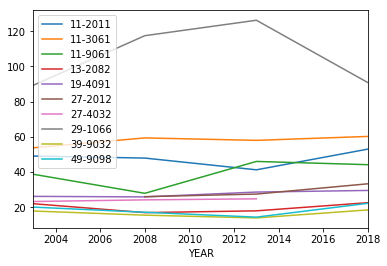

In [13]:
highest_h_mean= pd.read_sql_query("SELECT OCC_CODE,OCC_TITLE,H_MEAN,YEAR FROM occ_table WHERE OCC_CODE IN ('27-2012','11-9061','49-9098','19-4091','11-2011','11-3061','29-1066','39-9032','13-2082','27-4032')", con)
highest_h_mean.set_index('YEAR', inplace=True)
highest_h_mean.groupby('OCC_CODE')['H_MEAN'].plot(legend=True)

In [15]:
#offset it to avoid na data
lowest_h_ave=pd.read_sql_query("SELECT OCC_CODE,OCC_TITLE,AVG(H_CHANGE) as H_average FROM occ_table GROUP BY OCC_CODE ORDER BY H_average ASC LIMIT 10 OFFSET 12", con)
lowest_h_ave

,OCC_CODE,OCC_TITLE,H_average
0,29-1011,chiropractors,-0.242064
1,13-1121,"meeting, convention, and event planners",-0.225118
2,13-2021,appraisers and assessors of real estate,-0.220821
3,51-3091,"food and tobacco roasting, baking, and drying ...",-0.190703
4,17-3025,environmental engineering technicians,-0.180274
5,51-4023,"rolling machine setters, operators, and tender...",-0.179433
6,53-7021,crane and tower operators,-0.168824
7,49-3022,automotive glass installers and repairers,-0.168186
8,25-1194,"vocational education teachers, postsecondary",-0.167822
9,51-4122,"welding, soldering, and brazing machine setter...",-0.161642


OCC_CODE
13-1121    AxesSubplot(0.125,0.125;0.775x0.755)
13-2021    AxesSubplot(0.125,0.125;0.775x0.755)
17-3025    AxesSubplot(0.125,0.125;0.775x0.755)
25-1194    AxesSubplot(0.125,0.125;0.775x0.755)
29-1011    AxesSubplot(0.125,0.125;0.775x0.755)
49-3022    AxesSubplot(0.125,0.125;0.775x0.755)
51-3091    AxesSubplot(0.125,0.125;0.775x0.755)
51-4023    AxesSubplot(0.125,0.125;0.775x0.755)
51-4122    AxesSubplot(0.125,0.125;0.775x0.755)
53-7021    AxesSubplot(0.125,0.125;0.775x0.755)
Name: H_MEAN, dtype: object

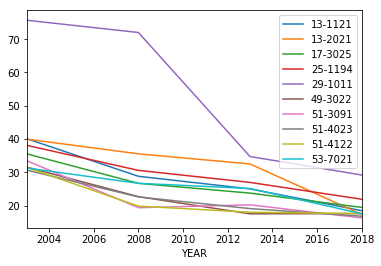

In [16]:
lowest_h_mean= pd.read_sql_query("SELECT OCC_CODE,OCC_TITLE,H_MEAN,YEAR FROM occ_table WHERE OCC_CODE IN ('29-1011','13-1121','13-2021','51-3091','17-3025','51-4023','53-7021','49-3022','25-1194','51-4122')", con)
lowest_h_mean.set_index('YEAR', inplace=True)
lowest_h_mean.groupby('OCC_CODE')['H_MEAN'].plot(legend=True)

In [17]:
#This is sorting the data by the average annual percent change. Where those with the highest percent change fairing better.   
highest_a_ave=pd.read_sql_query("SELECT OCC_CODE,OCC_TITLE, AVG(A_CHANGE) as A_average FROM occ_table GROUP BY OCC_CODE ORDER BY A_average DESC LIMIT 10", con)
highest_a_ave

,OCC_CODE,OCC_TITLE,A_average
0,11-9061,funeral service managers,0.109700
1,25-1121,"art, drama, and music teachers, postsecondary",0.082466
2,49-9098,"helpers--installation, maintenance, and repair...",0.079867
3,53-2012,commercial pilots,0.049790
4,19-4091,environmental science and protection technicia...,0.042487
5,11-2011,advertising and promotions managers,0.040891
6,11-3061,purchasing managers,0.039937
7,29-1066,psychiatrists,0.036582
8,39-9032,recreation workers,0.031165
9,13-2082,tax preparers,0.029084


OCC_CODE
11-2011    AxesSubplot(0.125,0.125;0.775x0.755)
11-3061    AxesSubplot(0.125,0.125;0.775x0.755)
11-9061    AxesSubplot(0.125,0.125;0.775x0.755)
13-2082    AxesSubplot(0.125,0.125;0.775x0.755)
19-4091    AxesSubplot(0.125,0.125;0.775x0.755)
25-1121    AxesSubplot(0.125,0.125;0.775x0.755)
29-1066    AxesSubplot(0.125,0.125;0.775x0.755)
39-9032    AxesSubplot(0.125,0.125;0.775x0.755)
49-9098    AxesSubplot(0.125,0.125;0.775x0.755)
53-2012    AxesSubplot(0.125,0.125;0.775x0.755)
Name: A_MEAN, dtype: object

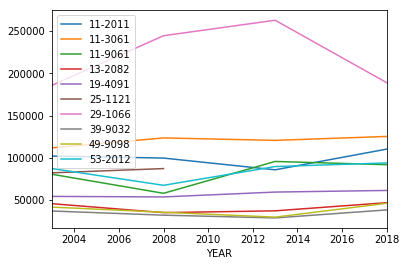

In [18]:
highest_a_mean= pd.read_sql_query("SELECT OCC_CODE,OCC_TITLE,A_MEAN,YEAR FROM occ_table WHERE OCC_CODE IN ('11-9061','25-1121','49-9098','53-2012','19-4091','11-2011','11-3061','29-1066','39-9032','13-2082')", con)
highest_a_mean.set_index('YEAR', inplace=True)
highest_a_mean.groupby('OCC_CODE')['A_MEAN'].plot(legend=True)

In [19]:
#This is sorting the data by the average annual percent change. Where those with the lowest percent change fairing better.   
lowest_a_ave=pd.read_sql_query("SELECT OCC_CODE,OCC_TITLE, AVG(A_CHANGE) as A_average FROM occ_table GROUP BY OCC_CODE ORDER BY A_average ASC LIMIT 10", con)
lowest_a_ave

,OCC_CODE,OCC_TITLE,A_average
0,29-1011,chiropractors,-0.242086
1,13-1121,"meeting, convention, and event planners",-0.225118
2,13-2021,appraisers and assessors of real estate,-0.220818
3,29-9091,athletic trainers,-0.192253
4,51-3091,"food and tobacco roasting, baking, and drying ...",-0.190689
5,17-3025,environmental engineering technicians,-0.180318
6,51-4023,"rolling machine setters, operators, and tender...",-0.179492
7,53-7021,crane and tower operators,-0.168827
8,49-3022,automotive glass installers and repairers,-0.168263
9,25-1194,"vocational education teachers, postsecondary",-0.167853


OCC_CODE
13-1121    AxesSubplot(0.125,0.125;0.775x0.755)
13-2021    AxesSubplot(0.125,0.125;0.775x0.755)
17-3025    AxesSubplot(0.125,0.125;0.775x0.755)
25-1194    AxesSubplot(0.125,0.125;0.775x0.755)
29-1011    AxesSubplot(0.125,0.125;0.775x0.755)
29-9091    AxesSubplot(0.125,0.125;0.775x0.755)
49-3022    AxesSubplot(0.125,0.125;0.775x0.755)
51-3091    AxesSubplot(0.125,0.125;0.775x0.755)
51-4023    AxesSubplot(0.125,0.125;0.775x0.755)
53-7021    AxesSubplot(0.125,0.125;0.775x0.755)
Name: A_MEAN, dtype: object

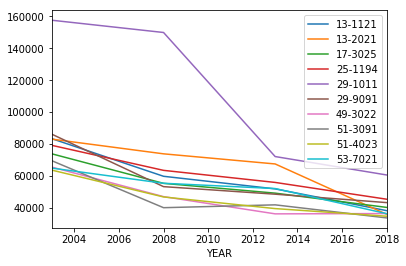

In [20]:
lowest_a_mean= pd.read_sql_query("SELECT OCC_CODE,OCC_TITLE,A_MEAN,YEAR FROM occ_table WHERE OCC_CODE IN ('29-1011','13-1121','13-2021','29-9091','51-3091','17-3025','51-4023','53-7021','49-3022','25-1194')", con)
lowest_a_mean.set_index('YEAR', inplace=True)
lowest_a_mean.groupby('OCC_CODE')['A_MEAN'].plot(legend=True)